In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

# What we're going to do:

1. Combine all the datasets together
2. Define n emotions
3. Check and remove duplicates
4. Check the distribution of the categories
5. Flatten the distribution

## Load dataframes

In [2]:
raw_df_0 = pd.read_csv('./data/raw/emotions_0.csv', index_col=0)
raw_df_1 = pd.read_csv('./data/raw/emotions_1.csv', index_col=0)
raw_df_2 = pd.read_csv('./data/raw/emotions_2.csv', index_col=0)
raw_df_3 = pd.read_csv('./data/raw/emotions_3.csv', index_col=0)
raw_df_4 = pd.read_csv('./data/raw/emotions_4.csv', index_col=0)
raw_df_5 = pd.read_csv('./data/raw/emotions_5.csv', index_col=0)
raw_df_6 = pd.read_csv('./data/raw/emotions_6.csv', index_col=0)

raw_df_0

,id,date,user,text,emotion
0,1348669486514249730,2021-01-11 16:33:57,Zaquawn5,Me angrily drawing something (sorry it doesn’t...,angry
1,1348662117495312385,2021-01-11 16:04:40,AniruddhaBhakti,Sadguru Shree Aniruddha explains how one shoul...,angry
2,1348660886723055622,2021-01-11 15:59:46,cheesybreadaj,hayden stop looking at my social media i am #a...,angry
3,1348652024657833984,2021-01-11 15:24:34,RepetApp,"Damn, my gf calls me by name 😨😱\n\n#damn #mygi...",angry
4,1348648574007926785,2021-01-11 15:10:51,Flora34574173,It is not within everybody's power to be #angr...,angry
...,...,...,...,...,...
550,1346637816168673280,2021-01-06 02:00:49,ArabellaPalumbo,"Faces 3, 4 &amp; 5\n(Not sure about the lip)\n...",disgust
551,1346319540234252289,2021-01-05 04:56:06,peculiART927,Inside Out Characters tutorial full vid⬇️\nhtt...,disgust
552,1346319517480148998,2021-01-05 04:56:01,peculiART927,"Inside Out Characters pt. 2\n(Anger, Fear, &am...",disgust
553,1346276466263285761,2021-01-05 02:04:56,kimpita,#truth #disgust #shameful \n\nBring on January...,disgust


## Combine datasets

In [3]:
df = pd.concat([raw_df_0, raw_df_1, raw_df_2, raw_df_3, raw_df_4, raw_df_5, raw_df_6])

df

,id,date,user,text,emotion
0,1348669486514249730,2021-01-11 16:33:57,Zaquawn5,Me angrily drawing something (sorry it doesn’t...,angry
1,1348662117495312385,2021-01-11 16:04:40,AniruddhaBhakti,Sadguru Shree Aniruddha explains how one shoul...,angry
2,1348660886723055622,2021-01-11 15:59:46,cheesybreadaj,hayden stop looking at my social media i am #a...,angry
3,1348652024657833984,2021-01-11 15:24:34,RepetApp,"Damn, my gf calls me by name 😨😱\n\n#damn #mygi...",angry
4,1348648574007926785,2021-01-11 15:10:51,Flora34574173,It is not within everybody's power to be #angr...,angry
...,...,...,...,...,...
6773,1346395201712115712,2021-01-05 09:56:45,KingOfCnut,"Tag whoever you want, they get it, you don’t 😂...",angry
6774,1346375559169929216,2021-01-05 08:38:42,Miss_FionaM,Really don't need a brainless so called friend...,angry
6775,1346373563473940486,2021-01-05 08:30:46,RShoppingland,We are a angry!\n\nhttps://t.co/Pel5LBU4h3\n.\...,angry
6776,1346366881922510851,2021-01-05 08:04:13,1200TECHNO,NVM IT IS DOWN AGAIN....... #ihatemylife #iwan...,angry


## Define n emotions

Emotions:
* Joy
* Love
* Disgust
* Constructive feedback
* Anger/hate

In [4]:
df['emotion'].unique()

array(['angry', 'joy', 'advice', 'happy', 'love', 'disgust', nan,
       'Disgust', 'disgusting', 'Disgusting', 'Advice', 'feedback',
       'Feedback', 'anger', 'Anger', 'hate', 'rage', 'Rage', 'Hate',
       'dislike', 'Angry'], dtype=object)

In [5]:
#####

# Remove NaN emotions

indeces = []

for idx, row in enumerate(df['emotion'].isnull()):
    if row == True:
        indeces.append(idx)

[df.iloc[i] for i in indeces]

[id                                       1348246009307164679
 date                                     2021-01-10 12:31:12
 user                                            software4iot
 text       #IoT  Internet of Things. IoT Infrastructures:...
 emotion                                                  NaN
 Name: 10554, dtype: object,
 id         love
 date        NaN
 user        NaN
 text        NaN
 emotion     NaN
 Name:  #love, dtype: object]

In [6]:
df.isnull().sum()

id         0
date       1
user       1
text       1
emotion    2
dtype: int64

In [7]:
df.dropna(inplace=True)

print(df.iloc[28248], df.iloc[28249])

#####

id                                       1348245894596943873
date                                     2021-01-10 12:30:45
user                                           confessionbee
text       My ❤️ for him is eternal.\nWishing him a very ...
emotion                                                 love
Name: 10555, dtype: object id                                       1348245865002098689
date                                     2021-01-10 12:30:38
user                                           simplefasting
text       There's a lot of information on what to do aro...
emotion                                                 love
Name: 10556, dtype: object


In [8]:
df.isnull().sum()

id         0
date       0
user       0
text       0
emotion    0
dtype: int64

In [9]:
df['emotion'].unique()

array(['angry', 'joy', 'advice', 'happy', 'love', 'disgust', 'Disgust',
       'disgusting', 'Disgusting', 'Advice', 'feedback', 'Feedback',
       'anger', 'Anger', 'hate', 'rage', 'Rage', 'Hate', 'dislike',
       'Angry'], dtype=object)

In [10]:
def decode_sentiment(label):
    if label == 'happy':
        return 'joy'
    elif label == 'Disgust' or label == 'disgusting' or label == 'Disgusting':
        return 'disgust'
    elif label == 'advice' or label == 'Advice' or label == 'feedback' or label == 'Feedback':
        return 'constructive feedback'
    elif label == 'Anger' or label == 'angry' or label == 'rage' or label == 'Rage' or label == 'Hate' or label == 'hate' or label == 'Angry' or label == 'anger' or label == 'dislike':
        return 'anger/hate'
    else:
        return label


df['emotion'] = df['emotion'].apply(lambda x: decode_sentiment(x))

df['emotion'].unique()

array(['anger/hate', 'joy', 'constructive feedback', 'love', 'disgust'],
      dtype=object)

In [11]:
df

,id,date,user,text,emotion
0,1348669486514249730,2021-01-11 16:33:57,Zaquawn5,Me angrily drawing something (sorry it doesn’t...,anger/hate
1,1348662117495312385,2021-01-11 16:04:40,AniruddhaBhakti,Sadguru Shree Aniruddha explains how one shoul...,anger/hate
2,1348660886723055622,2021-01-11 15:59:46,cheesybreadaj,hayden stop looking at my social media i am #a...,anger/hate
3,1348652024657833984,2021-01-11 15:24:34,RepetApp,"Damn, my gf calls me by name 😨😱\n\n#damn #mygi...",anger/hate
4,1348648574007926785,2021-01-11 15:10:51,Flora34574173,It is not within everybody's power to be #angr...,anger/hate
...,...,...,...,...,...
6773,1346395201712115712,2021-01-05 09:56:45,KingOfCnut,"Tag whoever you want, they get it, you don’t 😂...",anger/hate
6774,1346375559169929216,2021-01-05 08:38:42,Miss_FionaM,Really don't need a brainless so called friend...,anger/hate
6775,1346373563473940486,2021-01-05 08:30:46,RShoppingland,We are a angry!\n\nhttps://t.co/Pel5LBU4h3\n.\...,anger/hate
6776,1346366881922510851,2021-01-05 08:04:13,1200TECHNO,NVM IT IS DOWN AGAIN....... #ihatemylife #iwan...,anger/hate


## Handle duplicates

In [12]:
df.duplicated(subset=['text'], keep='first').sum()

32374

In [13]:
# Drop duplicates
df.drop_duplicates(subset=['text'], keep='first')

,id,date,user,text,emotion
0,1348669486514249730,2021-01-11 16:33:57,Zaquawn5,Me angrily drawing something (sorry it doesn’t...,anger/hate
1,1348662117495312385,2021-01-11 16:04:40,AniruddhaBhakti,Sadguru Shree Aniruddha explains how one shoul...,anger/hate
2,1348660886723055622,2021-01-11 15:59:46,cheesybreadaj,hayden stop looking at my social media i am #a...,anger/hate
3,1348652024657833984,2021-01-11 15:24:34,RepetApp,"Damn, my gf calls me by name 😨😱\n\n#damn #mygi...",anger/hate
4,1348648574007926785,2021-01-11 15:10:51,Flora34574173,It is not within everybody's power to be #angr...,anger/hate
...,...,...,...,...,...
6028,1348476212662906881,2021-01-11 03:45:57,mexicanwarofin1,a lot of indigenous and mestizo people are ups...,anger/hate
6114,1347829107636252675,2021-01-09 08:54:35,ScottGuillory6,"If you think these people are angry, just wait...",anger/hate
6119,1347785149044310016,2021-01-09 05:59:54,jikm1nn,my dms broke i am #angry,anger/hate
6155,1347577693898829827,2021-01-08 16:15:33,ecarr_becky,The divide will continue to grow in this count...,anger/hate


## Explore categories distribution

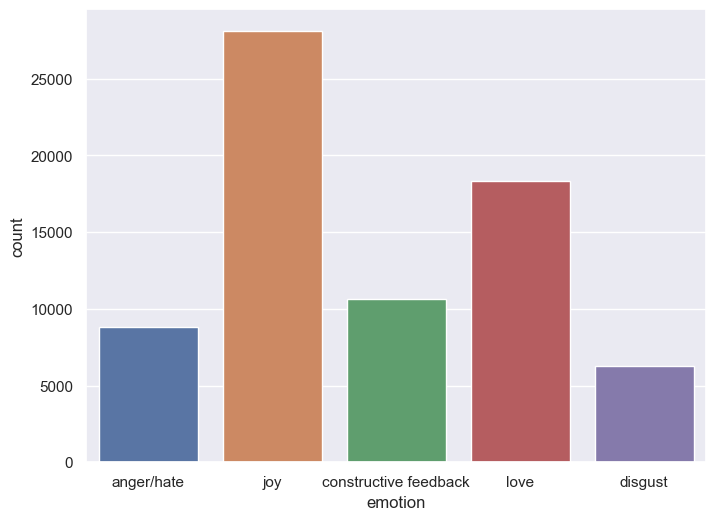

In [14]:
plt.figure(figsize=(8, 6), dpi=100)
sns.countplot(x='emotion', data=df)
plt.show()

In [15]:
df.groupby('emotion').count().text

emotion
anger/hate                8829
constructive feedback    10632
disgust                   6271
joy                      28107
love                     18345
Name: text, dtype: int64

## Flatten distribution

Since there is a disproportionate amount of rows with the "joy" label, I will remove around 15000 rows

In [16]:
# Create joy dataset
joy_df = df[df['emotion'] == 'joy']

joy_df

,id,date,user,text,emotion
100,1348673300860383232,2021-01-11 16:49:06,hamutal1505,@StarbucksKorea I love this #collab between #s...,joy
101,1348673233256652800,2021-01-11 16:48:50,LucidMadeIt,Premiering at 11am cst!! Set a reminder now! C...,joy
102,1348671857109704715,2021-01-11 16:43:22,MassageEnvyHI,We love reading your reviews 💜🌺🌴💪 #massageenvy...,joy
103,1348671751320981505,2021-01-11 16:42:57,lou_bitch,Lots of pigeon visiting the garden this mornin...,joy
104,1348671114185113609,2021-01-11 16:40:25,mvvenkataraman,"#If rain's stay is #longer,\n\nHearts will sin...",joy
...,...,...,...,...,...
16820,1346066610470211584,2021-01-04 12:11:03,HoodrichClement,📷 Double Exposure 💯💯💪 #hoodrichphotography #li...,joy
16821,1346066110492250112,2021-01-04 12:09:04,happytakepon,"Work started today. I was very busy,but I felt...",joy
16822,1346065738189189122,2021-01-04 12:07:35,LivingCozy,#Happy and beautiful #Monday! After two wonder...,joy
16823,1346065721025994752,2021-01-04 12:07:31,boakye_wasty,#HAPPY NEW YEAR#\n\nLet's start the year with ...,joy


In [17]:
# Shuffle dataset
joy_df = joy_df.sample(frac=1).reset_index(drop=True)

# Remove 15000 examples from joy dataset
joy_df = joy_df[15000:]

joy_df

,id,date,user,text,emotion
15000,1348583689781981184,2021-01-11 10:53:01,suswatibasu,"Hi all, I'm look for people to record a short ...",joy
15001,1346864763645681664,2021-01-06 17:02:37,AskDrCovington,For the #love of #OccupationalTherapy - #OT365...,joy
15002,1346524927478947840,2021-01-05 18:32:14,Xikombi16743841,#Happy birthday baby sister!!!\n🎂🎂🥂❤❤ https://...,joy
15003,1346369936877379584,2021-01-05 08:16:21,_AnthonyHeath,⛪️ Matthew 11:28 ❤️\n\n#GodWins #GodIsGood #jo...,joy
15004,1347557789565071365,2021-01-08 14:56:28,strauss51,"It’s always fun to crank up the music, dance a...",joy
...,...,...,...,...,...
28102,1346471343915585538,2021-01-05 14:59:19,braintickler_,"JOKE OF THE DAY : I'd like to start a diet, bu...",joy
28103,1346497129112592391,2021-01-05 16:41:46,TrevHaworth,"6 months gone, 6 to go in my year of health.\n...",joy
28104,1346647081482653696,2021-01-06 02:37:38,MelissaChipps,Coaching with Melissa \n386-569-5188 \n\n#wing...,joy
28105,1347554565097353218,2021-01-08 14:43:39,MysticWhiteRo,Get out of your head and get into your heart. ...,joy


In [18]:
# Remove joy from original df
df = df[df['emotion'] != 'joy']

df.groupby('emotion').count().text

emotion
anger/hate                8829
constructive feedback    10632
disgust                   6271
love                     18345
Name: text, dtype: int64

In [19]:
# Add new joy df to original df
df = pd.concat([df, joy_df])

df

,id,date,user,text,emotion
0,1348669486514249730,2021-01-11 16:33:57,Zaquawn5,Me angrily drawing something (sorry it doesn’t...,anger/hate
1,1348662117495312385,2021-01-11 16:04:40,AniruddhaBhakti,Sadguru Shree Aniruddha explains how one shoul...,anger/hate
2,1348660886723055622,2021-01-11 15:59:46,cheesybreadaj,hayden stop looking at my social media i am #a...,anger/hate
3,1348652024657833984,2021-01-11 15:24:34,RepetApp,"Damn, my gf calls me by name 😨😱\n\n#damn #mygi...",anger/hate
4,1348648574007926785,2021-01-11 15:10:51,Flora34574173,It is not within everybody's power to be #angr...,anger/hate
...,...,...,...,...,...
28102,1346471343915585538,2021-01-05 14:59:19,braintickler_,"JOKE OF THE DAY : I'd like to start a diet, bu...",joy
28103,1346497129112592391,2021-01-05 16:41:46,TrevHaworth,"6 months gone, 6 to go in my year of health.\n...",joy
28104,1346647081482653696,2021-01-06 02:37:38,MelissaChipps,Coaching with Melissa \n386-569-5188 \n\n#wing...,joy
28105,1347554565097353218,2021-01-08 14:43:39,MysticWhiteRo,Get out of your head and get into your heart. ...,joy


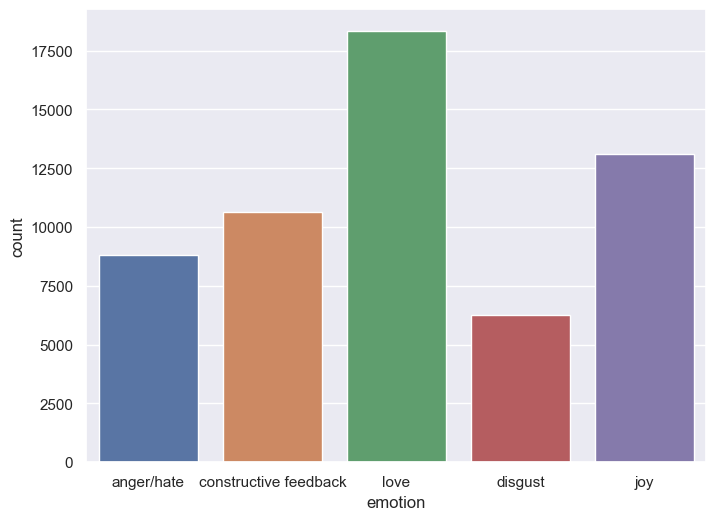

In [20]:
plt.figure(figsize=(8, 6), dpi=100)
sns.countplot(x='emotion', data=df)
plt.show()

In [21]:
df.groupby('emotion').count().text

emotion
anger/hate                8829
constructive feedback    10632
disgust                   6271
joy                      13107
love                     18345
Name: text, dtype: int64

### Now same thing with love label

In [22]:
# Create love dataset
love_df = df[df['emotion'] == 'love']

# Shuffle dataset
love_df = love_df.sample(frac=1).reset_index(drop=True)

# Remove 5000 examples from joy dataset
love_df = love_df[5000:]

# Remove joy from original df
df = df[df['emotion'] != 'love']

# Add new joy df to original df
df = pd.concat([df, love_df])

df

,id,date,user,text,emotion
0,1348669486514249730,2021-01-11 16:33:57,Zaquawn5,Me angrily drawing something (sorry it doesn’t...,anger/hate
1,1348662117495312385,2021-01-11 16:04:40,AniruddhaBhakti,Sadguru Shree Aniruddha explains how one shoul...,anger/hate
2,1348660886723055622,2021-01-11 15:59:46,cheesybreadaj,hayden stop looking at my social media i am #a...,anger/hate
3,1348652024657833984,2021-01-11 15:24:34,RepetApp,"Damn, my gf calls me by name 😨😱\n\n#damn #mygi...",anger/hate
4,1348648574007926785,2021-01-11 15:10:51,Flora34574173,It is not within everybody's power to be #angr...,anger/hate
...,...,...,...,...,...
18340,1347955849214398464,2021-01-09 17:18:12,provivirpanama,#panama #pty #panamacity #507 #travel #venezue...,love
18341,1348056106661150721,2021-01-09 23:56:36,Ricardo20417711,Chalk artist https://t.co/y6TgOMCf8s via @YouT...,love
18342,1348510377554882560,2021-01-11 06:01:42,ImFeet1,@XXL Please subscribe to my @YouTube\nfollow m...,love
18343,1347967649003790337,2021-01-09 18:05:06,JBCookieCutters,I Love You 263-090 Latte Art Stencil now avail...,love


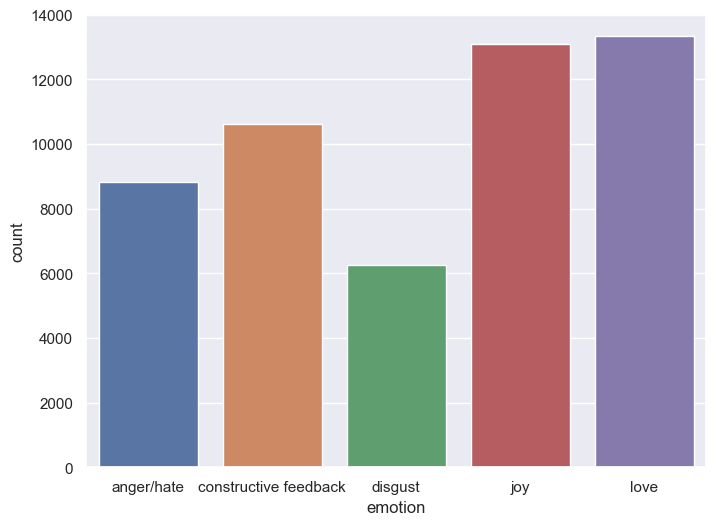

In [23]:
plt.figure(figsize=(8, 6), dpi=100)
sns.countplot(x='emotion', data=df)
plt.show()

In [24]:
df.groupby('emotion').count().text

emotion
anger/hate                8829
constructive feedback    10632
disgust                   6271
joy                      13107
love                     13345
Name: text, dtype: int64

## Explore dataset

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52184 entries, 0 to 18344
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       52184 non-null  object
 1   date     52184 non-null  object
 2   user     52184 non-null  object
 3   text     52184 non-null  object
 4   emotion  52184 non-null  object
dtypes: object(5)
memory usage: 3.6+ MB


In [26]:
df.isnull().sum()

id         0
date       0
user       0
text       0
emotion    0
dtype: int64

# Remove hashtags, mentions and links from text

In [27]:
df.text

0        Me angrily drawing something (sorry it doesn’t...
1        Sadguru Shree Aniruddha explains how one shoul...
2        hayden stop looking at my social media i am #a...
3        Damn, my gf calls me by name 😨😱\n\n#damn #mygi...
4        It is not within everybody's power to be #angr...
                               ...                        
18340    #panama #pty #panamacity #507 #travel #venezue...
18341    Chalk artist https://t.co/y6TgOMCf8s via @YouT...
18342    @XXL Please subscribe to my @YouTube\nfollow m...
18343    I Love You 263-090 Latte Art Stencil now avail...
18344    "Jesus saith unto him, Thou hast said: neverth...
Name: text, Length: 52184, dtype: object

In [28]:
import re
import string

# Remove links
def strip_links(text):
    link_regex = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL)
    links = re.findall(link_regex, text)
    for link in links:
        text = text.replace(link[0], ', ')    
    return text

# Remove hashtags and mentions
def strip_all_entities(text):
    entity_prefixes = ['@','#']
    for separator in  string.punctuation:
        if separator not in entity_prefixes :
            text = text.replace(separator,' ')
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in entity_prefixes:
                words.append(word)
    return ' '.join(words)


df['text'] = df['text'].apply(lambda t: strip_all_entities(strip_links(t)))

In [29]:
df.text

0        Me angrily drawing something sorry it doesn’t ...
1        Sadguru Shree Aniruddha explains how one shoul...
2              hayden stop looking at my social media i am
3                           Damn my gf calls me by name 😨😱
4        It is not within everybody s power to be With ...
                               ...                        
18340                                              WEBSITE
18341                                     Chalk artist via
18342    Please subscribe to my follow my and enjoy thi...
18343    I Love You 263 090 Latte Art Stencil now avail...
18344    Jesus saith unto him Thou hast said neverthele...
Name: text, Length: 52184, dtype: object

### Remove row in which the field text is empty

In [30]:
df[df['text'] == '']

,id,date,user,text,emotion
7163,1346456667865681920,2021-01-05 14:01:00,BREADHUNTER1,,constructive feedback
7150,1346456667865681920,2021-01-05 14:01:00,BREADHUNTER1,,constructive feedback
8130,1346456667865681920,2021-01-05 14:01:00,BREADHUNTER1,,constructive feedback
15194,1348380294332743680,2021-01-10 21:24:48,NaomiKilchhofer,,joy
15884,1346109259294105600,2021-01-04 15:00:31,the_bridge4,,joy
16191,1347852827373146115,2021-01-09 10:28:50,tore8673,,joy
18055,1346993009662046209,2021-01-07 01:32:14,RelatedBaby,,joy
18557,1347811443094253568,2021-01-09 07:44:23,441Grados,,joy
18991,1346516995047649284,2021-01-05 18:00:43,the_bridge4,,joy
18994,1347852827373146115,2021-01-09 10:28:50,tore8673,,joy


In [31]:
# Replace empty cells with NaN
df['text'].replace('', np.nan, inplace=True)

df[df['text'] == '']

,id,date,user,text,emotion


In [32]:
df.isnull().sum()

id          0
date        0
user        0
text       48
emotion     0
dtype: int64

In [33]:
# Drop those rows
df.dropna(subset=['text'], inplace=True)

df.isnull().sum()

id         0
date       0
user       0
text       0
emotion    0
dtype: int64

# Finalize dataframe and export

In [34]:
# Shuffle dataframe
df = df.sample(frac=1).reset_index(drop=True)

# Get only text and emotion columns
df = df[[ 'text', 'emotion' ]]

df

,text,emotion
0,Y’all better get yours today You won’t be disa...,love
1,It is absolutely DANGEROUS that 45 s supporter...,disgust
2,It s Monday Time to focus,love
3,Prem Rawat,joy
4,We re human We feel it but can control it,anger/hate
...,...,...
52131,Healing requires we be fully aware of our feel...,anger/hate
52132,provided an environment for the soul to increa...,love
52133,Was waiting for the sun to rise 😁 favourite ❤🙏...,love
52134,The rep in this week s countdown is student Ty...,joy


In [35]:
df.to_csv('./data/edited/emotions.csv')